# Question 2

## Description

Develop an algorithm to find an image in another image by compare image histogram with the samples from another image

## Import required dependencies

- Import cv2 for read and map the color channels
- Import math to get the maximum number we can use as infinite
- Import numpy to work with arrays
- Import matplotlib to show image for each step

In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

## Read Image

Read Messi Image and map the color from bgr to rgb, because imread read image in bgr order 

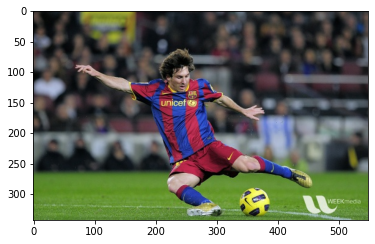

In [2]:
image = cv2.imread("../images/messi5.jpg")

# Convert BGR order to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

# Crop Ball From Messi Image

Crop an image to use is as target image

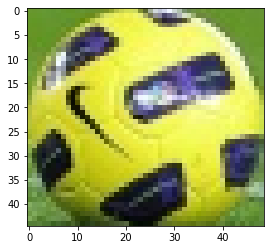

In [3]:
ball_image = image[290:335, 338:387, :]
plt.imshow(ball_image)

## Defined Histogram Function

Histogram is an array contains 256 item that each item is the count of the color in the image

In [4]:
def calcHist(image):
    histogram = np.zeros(256)

    for c in range(image.shape[2]):
        for h in range(image.shape[0]):
            for w in range(image.shape[1]):
                # Increase the number of color
                histogram[image[h, w, c]] += 1

    return histogram

## Calculate Histogram

Calculate histogram of the image, this method are too slow to use, i recommend use OpenCV method

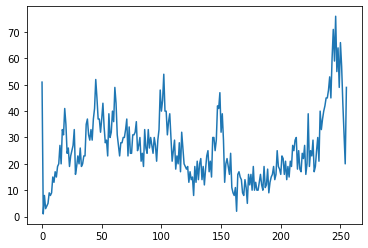

In [5]:
ball_image_hist = calcHist(ball_image)

plt.plot(ball_image_hist)
plt.show()

## Calculate Ball Histogram Using OpenCV

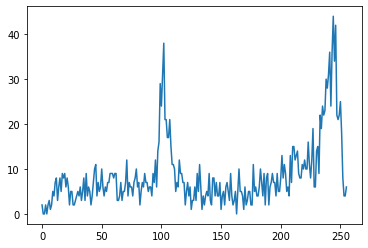

In [6]:
ball_image_hist = cv2.calcHist([ball_image],[0],None,[256],[0,256])

plt.plot(ball_image_hist)
plt.show()

## Implement Compare Histogram Function

We need to have a function to give us the diffrence of two histogram

1. Calculate the difference between the two array for each color
2. Calculate absolute value of the result array for each color
3. Caclulate sum of the values

In [7]:
def compareHistogram(sample, target):
    return np.sum(np.abs(sample - target))

## Create Padding Image

To match and compare sample of the orginal image with target image we should paddding the original image

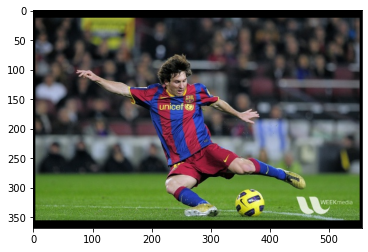

In [8]:
width_padding = math.floor((image.shape[1] % ball_image.shape[1]) / 2)
height_padding = math.floor((image.shape[0] % ball_image.shape[0]) / 2)

# Set the borders
padding_image = cv2.copyMakeBorder(image, height_padding, height_padding, width_padding, width_padding, cv2.BORDER_CONSTANT, value=0)

plt.imshow(padding_image)

## Initialize Variable

Store the size of the target image and initial the position target should be in original image

In [9]:
sample_step = 1
target_width = ball_image.shape[1]
target_height = ball_image.shape[0]

target_in_image_position = (0, 0, math.inf)  # (height, width, thrashold)

## Define Process Fucntion

A function scanning the image, crop sample from original image and compare it with histogram of the target image

In [10]:
def process(original_image):
    global target_in_image_position
    for j in range(0, original_image.shape[0], sample_step):
        for i in range(0, original_image.shape[1], sample_step):
            # Crop Sample from image
            sample = original_image[j:j + target_height, i:i + target_width, :]
            sample_hist = cv2.calcHist([sample], [0], None, [256], [0, 256])

            thrashold = compareHistogram(sample_hist, ball_image_hist)

            if(thrashold < target_in_image_position[2]):
                target_in_image_position = (j, i, thrashold)

## Process Image

In [11]:
process(padding_image)

# Crop Target From Image

Crop the result from image to confirm algorithm works

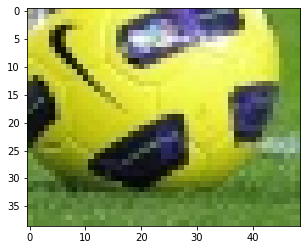

In [12]:
target_image = image[target_in_image_position[0]:target_in_image_position[0] +
                     target_height, target_in_image_position[1]:target_in_image_position[1] + target_width, :]

plt.imshow(target_image)

As result, we see ball with a small error, so i try process without padding image to check algorithm

## Initialize Variable

Reset the target position to check image without padding

In [13]:
target_in_image_position = (0, 0, math.inf)  # (height, width, thrashold)

## Process Image Without Padding 

In [14]:
process(image)

# Crop Target From Image

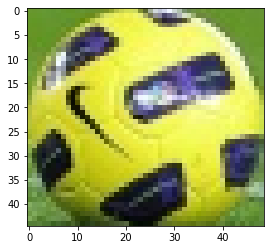

In [15]:
target_image = image[target_in_image_position[0]:target_in_image_position[0] +
                     target_height, target_in_image_position[1]:target_in_image_position[1] + target_width, :]

plt.imshow(target_image)

Finnaly the ball find in the exacly place :D